<div align="center"> TRAN VU HOANG ANH</div>

### Importing Libaries ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create and load data frame ###

In [2]:
df = pd.read_csv('tripvn.csv', index_col=0)

### Cleaning data ###

In [3]:
df['Mdn SSL (ms)'] = df['Mdn SSL (ms)'].fillna(0)

In [4]:
df['# Runs'] =  df['# Runs'].astype('float64')

In [5]:
df.head()

Test            Time  Mdn DNS (ms)  Mdn SSL (ms)  \
0  [204709] - trip.com  11/1/2017 0:00         287.5           0.0   
1  [204709] - trip.com  11/1/2017 2:00         254.5           0.0   
2  [204709] - trip.com  11/1/2017 4:00         228.0           0.0   
3  [204709] - trip.com  11/1/2017 6:00         180.0           0.0   
4  [204709] - trip.com  11/1/2017 8:00         227.0           0.0   

   Avg Time To First Byte (ms)  Mdn Webpage Response (ms)  \
0                       584.58                     9762.5   
1                       904.00                     8726.0   
2                       419.91                     9611.0   
3                       626.85                     9992.0   
4                       387.00                     8654.0   

   Mdn Render Start (ms)  Avg Image Bytes  Avg Script Bytes  Avg Css Bytes  \
0                 1048.0        750792.42         547889.58       10758.67   
1                 1049.0        674683.25         582856.67       10772.50   
2                  897.0        734774.91         578993.36       10761.00   
3                 1402.0        787461.77         584607.54       10760.77   
4                 1197.0        734543.82         579352.91       10764.73   

   % Availability  # Runs  
0          91.667    12.0  
1         100.000    12.0  
2         100.000    11.0  
3         100.000    13.0  
4         100.000    11.0

### Describing data of each column with Descriptive Statistic ###

In [6]:
df.describe().round(3)

Mdn DNS (ms)  Mdn SSL (ms)  Avg Time To First Byte (ms)  \
count       360.000         360.0                      360.000   
mean        280.076           0.0                      593.207   
std          70.514           0.0                      286.767   
min         108.500           0.0                      209.750   
25%         232.875           0.0                      401.748   
50%         274.750           0.0                      484.170   
75%         323.000           0.0                      710.353   
max         531.500           0.0                     1957.580   

       Mdn Webpage Response (ms)  Mdn Render Start (ms)  Avg Image Bytes  \
count                    360.000                360.000          360.000   
mean                    9593.342               1255.504       731153.379   
std                     1461.569                192.892        61567.945   
min                     7535.500                807.000       566819.580   
25%                     8954.875               1099.000       693059.518   
50%                     9486.750               1247.500       731137.745   
75%                     9997.625               1384.250       771768.625   
max                    30094.000               2194.500       908992.580   

       Avg Script Bytes  Avg Css Bytes  % Availability   # Runs  
count           360.000        360.000         360.000  360.000  
mean         573567.277      10767.403          95.263   11.961  
std           19237.707         25.518           6.690    0.356  
min          388817.400      10755.750          25.000   10.000  
25%          576244.872      10761.670          91.667   12.000  
50%          580734.760      10764.330         100.000   12.000  
75%          582433.523      10767.330         100.000   12.000  
max          610802.170      11081.250         100.000   13.000

## **Q1: Overview of Metrics** ##

### Finding correlation between columns ###

Overview graph of all columns.

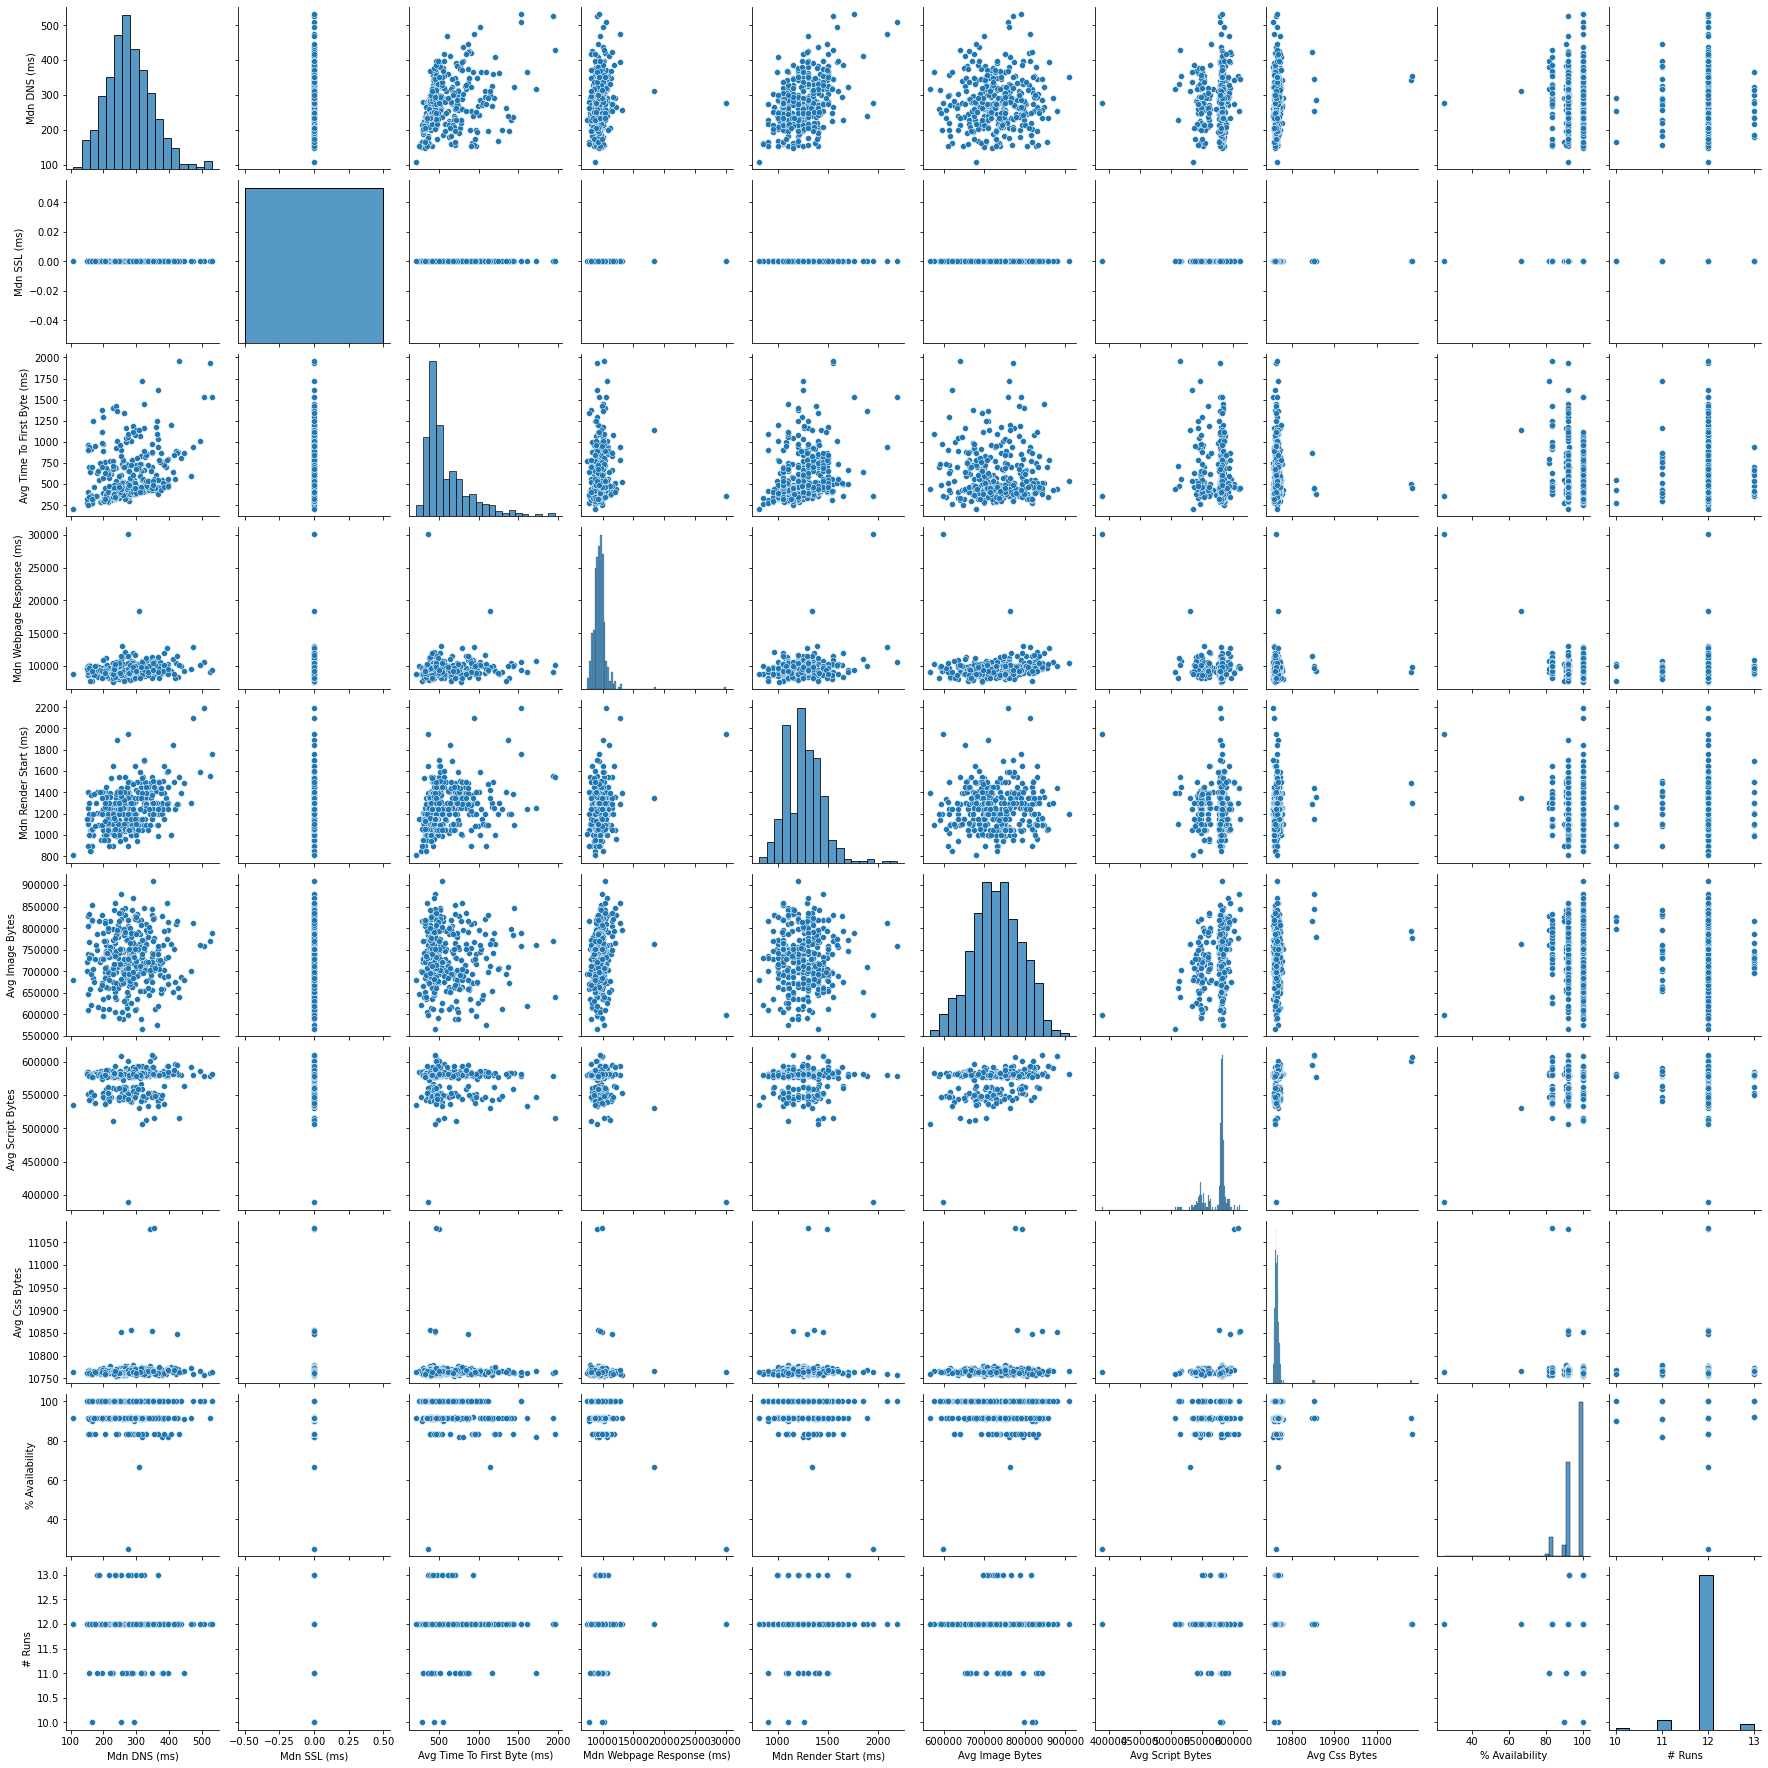

In [7]:
sns.pairplot(df)

To find the correlation between columns, we use pandas corr(). This give us a value known as Coeffiecient of Correlation ranging from 1 to -1. 
+ From 0 to 1: Meaning that the 2 columns have a positive (increase) relationship, the closer to 1 the stronger the relationship is.
+ From 0 to -1: Meaning that the 2 columns have a negative (decrease) relationship, the closer to -1 the stronger the relationship is.

In [8]:
df_corr_table = pd.DataFrame()
df_corr_table = df.corr()
df_corr_table.round(3).fillna(0)

Mdn DNS (ms)  Mdn SSL (ms)  \
Mdn DNS (ms)                        1.000           0.0   
Mdn SSL (ms)                        0.000           0.0   
Avg Time To First Byte (ms)         0.331           0.0   
Mdn Webpage Response (ms)           0.125           0.0   
Mdn Render Start (ms)               0.437           0.0   
Avg Image Bytes                     0.048           0.0   
Avg Script Bytes                    0.045           0.0   
Avg Css Bytes                       0.121           0.0   
% Availability                     -0.116           0.0   
# Runs                             -0.015           0.0   

                             Avg Time To First Byte (ms)  \
Mdn DNS (ms)                                       0.331   
Mdn SSL (ms)                                       0.000   
Avg Time To First Byte (ms)                        1.000   
Mdn Webpage Response (ms)                          0.074   
Mdn Render Start (ms)                              0.271   
Avg Image Bytes                                   -0.072   
Avg Script Bytes                                  -0.091   
Avg Css Bytes                                     -0.042   
% Availability                                    -0.176   
# Runs                                            -0.016   

                             Mdn Webpage Response (ms)  Mdn Render Start (ms)  \
Mdn DNS (ms)                                     0.125                  0.437   
Mdn SSL (ms)                                     0.000                  0.000   
Avg Time To First Byte (ms)                      0.074                  0.271   
Mdn Webpage Response (ms)                        1.000                  0.226   
Mdn Render Start (ms)                            0.226                  1.000   
Avg Image Bytes                                  0.122                  0.003   
Avg Script Bytes                                -0.430                 -0.086   
Avg Css Bytes                                   -0.004                  0.065   
% Availability                                  -0.518                 -0.185   
# Runs                                           0.027                  0.044   

                             Avg Image Bytes  Avg Script Bytes  Avg Css Bytes  \
Mdn DNS (ms)                           0.048             0.045          0.121   
Mdn SSL (ms)                           0.000             0.000          0.000   
Avg Time To First Byte (ms)           -0.072            -0.091         -0.042   
Mdn Webpage Response (ms)              0.122            -0.430         -0.004   
Mdn Render Start (ms)                  0.003            -0.086          0.065   
Avg Image Bytes                        1.000             0.302          0.111   
Avg Script Bytes                       0.302             1.000          0.176   
Avg Css Bytes                          0.111             0.176          1.000   
% Availability                        -0.049             0.502         -0.117   
# Runs                                -0.066            -0.018          0.018   

                             % Availability  # Runs  
Mdn DNS (ms)                         -0.116  -0.015  
Mdn SSL (ms)                          0.000   0.000  
Avg Time To First Byte (ms)          -0.176  -0.016  
Mdn Webpage Response (ms)            -0.518   0.027  
Mdn Render Start (ms)                -0.185   0.044  
Avg Image Bytes                      -0.049  -0.066  
Avg Script Bytes                      0.502  -0.018  
Avg Css Bytes                        -0.117   0.018  
% Availability                        1.000   0.116  
# Runs                                0.116   1.000

From the graph and the table above, we can see that what variables should be paired with each other. We also divide the pair into 2 categories:
+ **Strong Positive**, meaning both increase:
 + *Mdn DNS (ms)* and *Mdn Render Start (ms)*
 + *Avg Script Bytes* and *% Availability*
+ **Strong Negative**, meaning both decrease:
 + *Mdn Webpage Response (ms)* and *% Availability*
 +  *Mdn Webpage Response (ms)* and *Avg Script Bytes*

### Graph for strong positive pairs ###

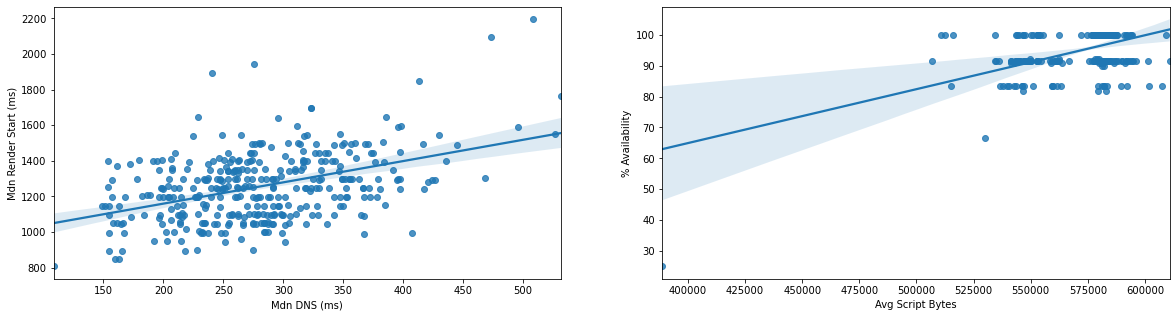

In [9]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(20,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.regplot(x="Mdn DNS (ms)", y="Mdn Render Start (ms)", data=df, ax = axis[0])
ax = sns.regplot(x="Avg Script Bytes", y="% Availability", data=df, ax = axis[1])

### Graph for strong negative pairs ###

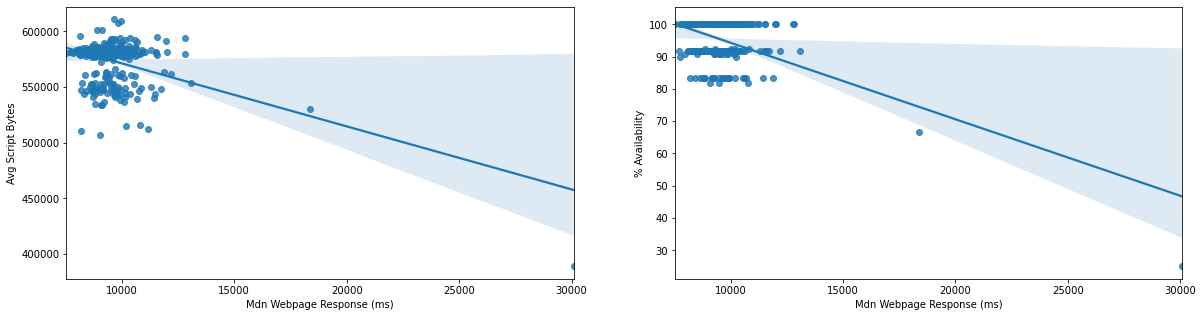

In [10]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(20,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.regplot(x="Mdn Webpage Response (ms)", y="Avg Script Bytes", data=df, ax = axis[0])
ax = sns.regplot(x="Mdn Webpage Response (ms)", y="% Availability", data=df, ax = axis[1])

## **Q2 Website Speed Metrics Analysis** ##

Trim data to collect all speed related column.

In [11]:
df_speed = pd.DataFrame()
df_speed = df.drop(['Test', 'Time', 'Mdn SSL (ms)', '% Availability', '# Runs'], axis = 1)

Overview graph of all speed related mertics.

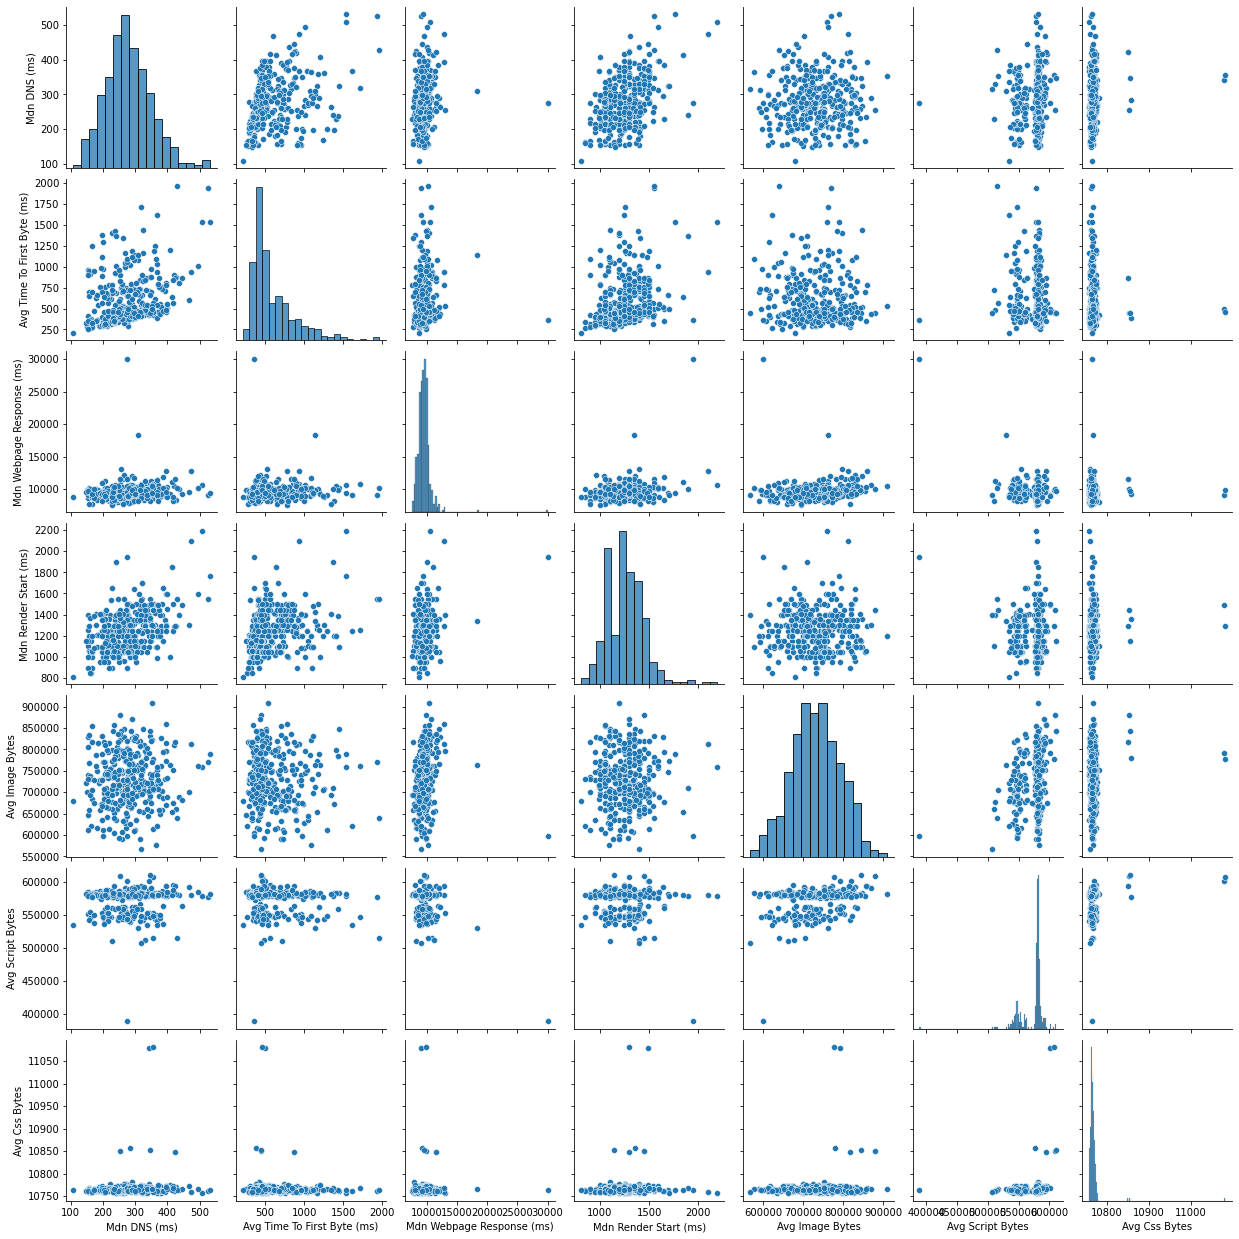

In [12]:
sns.pairplot(df_speed)

In [13]:
df_speed.describe().round(3)

Mdn DNS (ms)  Avg Time To First Byte (ms)  Mdn Webpage Response (ms)  \
count       360.000                      360.000                    360.000   
mean        280.076                      593.207                   9593.342   
std          70.514                      286.767                   1461.569   
min         108.500                      209.750                   7535.500   
25%         232.875                      401.748                   8954.875   
50%         274.750                      484.170                   9486.750   
75%         323.000                      710.353                   9997.625   
max         531.500                     1957.580                  30094.000   

       Mdn Render Start (ms)  Avg Image Bytes  Avg Script Bytes  Avg Css Bytes  
count                360.000          360.000           360.000        360.000  
mean                1255.504       731153.379        573567.277      10767.403  
std                  192.892        61567.945         19237.707         25.518  
min                  807.000       566819.580        388817.400      10755.750  
25%                 1099.000       693059.518        576244.872      10761.670  
50%                 1247.500       731137.745        580734.760      10764.330  
75%                 1384.250       771768.625        582433.523      10767.330  
max                 2194.500       908992.580        610802.170      11081.250

The columns that we focus on related to website speed:
+ Avg Time To First Byte (ms).
+ Mdn Webapage Response (ms).
+ Mdn Render Start (ms).
+ Mdn DNS (ms)

In [14]:
df_speed.corr().round(3)

Mdn DNS (ms)  Avg Time To First Byte (ms)  \
Mdn DNS (ms)                        1.000                        0.331   
Avg Time To First Byte (ms)         0.331                        1.000   
Mdn Webpage Response (ms)           0.125                        0.074   
Mdn Render Start (ms)               0.437                        0.271   
Avg Image Bytes                     0.048                       -0.072   
Avg Script Bytes                    0.045                       -0.091   
Avg Css Bytes                       0.121                       -0.042   

                             Mdn Webpage Response (ms)  Mdn Render Start (ms)  \
Mdn DNS (ms)                                     0.125                  0.437   
Avg Time To First Byte (ms)                      0.074                  0.271   
Mdn Webpage Response (ms)                        1.000                  0.226   
Mdn Render Start (ms)                            0.226                  1.000   
Avg Image Bytes                                  0.122                  0.003   
Avg Script Bytes                                -0.430                 -0.086   
Avg Css Bytes                                   -0.004                  0.065   

                             Avg Image Bytes  Avg Script Bytes  Avg Css Bytes  
Mdn DNS (ms)                           0.048             0.045          0.121  
Avg Time To First Byte (ms)           -0.072            -0.091         -0.042  
Mdn Webpage Response (ms)              0.122            -0.430         -0.004  
Mdn Render Start (ms)                  0.003            -0.086          0.065  
Avg Image Bytes                        1.000             0.302          0.111  
Avg Script Bytes                       0.302             1.000          0.176  
Avg Css Bytes                          0.111             0.176          1.000

"Render start" is the amount of time for the first content to appear on clients brower from when a request was sent. Which also include 2 other columns, "Avg Time To First Byte" is the time it take for the 1st byte to appear on client side and "Webapage Response" is the time websever take request and send the data back.

From the table above, we can see that "Avg Time To First Byte" and "Mdn Webpage Response" have positive correlation with "Render start". We can conclude that the more time a webite take longer time to render if that website sever take long time to respone, then lead to the delay of the 1st byte to reach client side.

There is another column that is "Mdn DNS (ms)" that is the time to lookup ip address of that website. This parameter have a strong correlation with "Render start" and "Webapage Response".

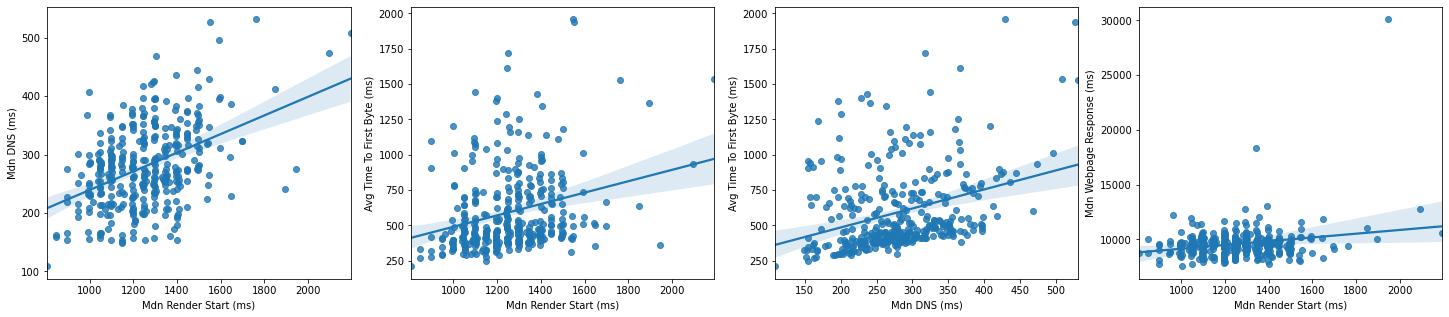

In [18]:
fig, axis = plt.subplots(nrows = 1, ncols= 4, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.regplot(x="Mdn Render Start (ms)", y="Mdn DNS (ms)", data=df, ax = axis[0])
ax = sns.regplot(x="Mdn DNS (ms)", y="Avg Time To First Byte (ms)", data=df, ax = axis[2])
ax = sns.regplot(x="Mdn Render Start (ms)", y="Mdn Webpage Response (ms)", data=df, ax = axis[3])
ax = sns.regplot(x="Mdn Render Start (ms)", y="Avg Time To First Byte (ms)", data=df, ax = axis[1])

## **Q3 Webstie Content Analysis** ##

In [16]:
df_content = pd.DataFrame()
df_content['Avg Image Bytes'] = df['Avg Image Bytes'] 
df_content['Avg Script Bytes'] = df['Avg Script Bytes']
df_content['Avg Css Bytes'] = df['Avg Css Bytes']

In [17]:
df_content

Avg Image Bytes  Avg Script Bytes  Avg Css Bytes
0          750792.42         547889.58       10758.67
1          674683.25         582856.67       10772.50
2          734774.91         578993.36       10761.00
3          787461.77         584607.54       10760.77
4          734543.82         579352.91       10764.73
..               ...               ...            ...
355        729606.45         538064.82       10762.73
356        908992.58         582276.42       10765.92
357        771258.33         581006.33       10765.08
358        685265.08         581263.17       10763.33
359        785543.17         578519.08       10760.42

[360 rows x 3 columns]

## **Q4 Webstie Ability** ##